In [1]:
#Importing libraries

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests as rq


In [2]:
#Create empty variables to store scrapped data
global rating, Aircraft, Class, Travel_type, Route, Date, comfort, staff, food, entertainment, wifi, ground_service, vfm, recommend

verified=[]
rating=[]
feedback=[]
Aircraft=[]
Class=[]
Travel_type=[]
Route=[]
Date=[]
comfort=[]
staff=[]
food=[]
entertainment=[]
wifi=[]
ground_service=[]
vfm=[]
recommend=[]

In [3]:
#Create a function that will iterate through the website for desired data
def value_fetcher(soup):
    rating.append(np.nan)
    Aircraft.append(np.nan)
    Class.append(np.nan)
    Travel_type.append(np.nan)
    Route.append(np.nan)
    Date.append(np.nan)
    comfort.append(np.nan)
    staff.append(np.nan)
    food.append(np.nan)
    entertainment.append(np.nan)
    wifi.append(np.nan)
    ground_service.append(np.nan)
    vfm.append(np.nan)
    recommend.append(np.nan)
    
    for row in soup.find_all('tr'):
        header = row.find('td', class_ ='review-rating-header' ).text
        value = row.find('td', class_ ='review-value' )
        if header == 'Aircraft':
            Aircraft[-1] = value.text
        elif header=='Type Of Traveller':
            Travel_type[-1]=value.text.strip()
        elif header=='Seat Type':
            Class[-1]=value.text.strip()
        elif header=='Route':
            Route[-1]=value.text.strip()
        elif header=='Date Flown':
            Date[-1]=value.text.strip()
        elif header=='Seat Comfort':
            comfort[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Cabin Staff Service':
            staff[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Food & Beverages':
            food[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Inflight Entertainment':
            entertainment[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Ground Service':
            ground_service[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Value For Money':
            vfm[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Recommended':
            recommend[-1]=value.text
        elif header=='Wifi & Connectivity':
            wifi[-1]=len(row.find_all('span',class_='star fill'))

In [4]:
def fetcher(soup,tag,key,value):
    if soup.find(tag,{key:value}):
        return soup.find(tag,{key:value}).text
    return np.nan

In [5]:
#Scraping the data
for i in range(1,367):
    url=f'https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/'
    page=rq.get(url).text
    soup=BeautifulSoup(page,'lxml')
    articles= soup.find_all('article',{'itemprop':'review'})
    for article in articles:
        rating.append(fetcher(article,'span','itemprop','ratingValue'))
        div=article.find('div',class_='tc_mobile')
        content=(div.find('div',class_='text_content').text.split('|'))
        if len(content)==2:
            verification,review=content
        else:
            verification =np.nan
            review=content[0]
        verified.append(verification)
        feedback.append(review)
        table=div.find('table',class_='review-ratings')
        value_fetcher(table)

In [6]:
#Use scrapped data to create a dataframe
data=pd.DataFrame({'status':verified,'aircraft':Aircraft,'travel_type':Travel_type,'travel_class':Class,'route':Route,'date':Date,'seating_comfort':comfort,'staff_service':staff,'food_quality':food,'entertainment':entertainment,'wifi':wifi,'ground_service':ground_service,'value_for_money':vfm,'recommended':recommend,'overall_rating':rating[::2],'review':feedback})

Storing scrapped data in a csv file 

In [7]:
#Store scrapped data in a csv
data.to_csv('British_Airways.csv',index=False)

In [8]:
import matplotlib.pyplot as pt
import seaborn as sn

Import Scrapped data for analysis

In [9]:
df = pd.read_csv('British_Airways.csv')
df.head(15)

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review
0,✅ Trip Verified,NaN,Solo Leisure,Business Class,London to Hong Kong,July 2023,1.0,5.0,3.0,3.0,NaN,5.0,1,no,1.0,They downgraded me from business to premium...
1,✅ Trip Verified,A320,Couple Leisure,Economy Class,Catania to Gatwick,October 2023,1.0,1.0,1.0,NaN,NaN,1.0,1,no,1.0,The already delayed aircraft landed and apa...
2,✅ Trip Verified,NaN,Couple Leisure,Economy Class,Gatwick to Venice,September 2023,NaN,NaN,NaN,NaN,NaN,1.0,1,no,2.0,Caught up in the Gatwick cancellation fiasc...
3,✅ Trip Verified,A321,Solo Leisure,Economy Class,Berlin to London,October 2023,3.0,1.0,1.0,NaN,NaN,1.0,1,no,1.0,BA has a real problem with boarding it's fl...
4,✅ Trip Verified,NaN,Couple Leisure,Economy Class,Atlanta to Glasgow via London,September 2023,3.0,3.0,1.0,4.0,4.0,1.0,3,no,1.0,Our connecting flight from London to Glasgow ...
5,✅ Trip Verified,Boeing 787,Couple Leisure,Economy Class,Singapore to Sydney,October 2023,1.0,1.0,2.0,1.0,NaN,1.0,1,no,1.0,The worst airline I have ever flown with. A...
6,✅ Trip Verified,Boeing 777,Solo Leisure,First Class,London to New York JFK,October 2023,5.0,5.0,5.0,4.0,5.0,5.0,5,yes,10.0,"Excellent service levels, proactive crew an..."
7,Not Verified,BA366,Couple Leisure,Business Class,Heathrow to Marseille,August 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,1.0,Booked a very special holiday for me and my ...
8,Not Verified,A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,October 2023,2.0,3.0,1.0,NaN,NaN,2.0,2,no,2.0,"Just returned from Chicago, flew out 10 days ..."
9,✅ Trip Verified,A320,Business,Business Class,London Heathrow to Munich,September 2023,2.0,1.0,2.0,NaN,1.0,1.0,1,no,2.0,BA standards continue to decline every time ...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           2151 non-null   object 
 1   aircraft         1907 non-null   object 
 2   travel_type      2903 non-null   object 
 3   travel_class     3657 non-null   object 
 4   route            2899 non-null   object 
 5   date             2896 non-null   object 
 6   seating_comfort  3545 non-null   float64
 7   staff_service    3534 non-null   float64
 8   food_quality     3280 non-null   float64
 9   entertainment    2533 non-null   float64
 10  wifi             599 non-null    float64
 11  ground_service   2828 non-null   float64
 12  value_for_money  3660 non-null   int64  
 13  recommended      3660 non-null   object 
 14  overall_rating   3655 non-null   float64
 15  review           3660 non-null   object 
dtypes: float64(7), int64(1), object(8)
memory usage: 457.6+ KB


Finding Null values

In [11]:
df.isnull().sum()

status             1509
aircraft           1753
travel_type         757
travel_class          3
route               761
date                764
seating_comfort     115
staff_service       126
food_quality        380
entertainment      1127
wifi               3061
ground_service      832
value_for_money       0
recommended           0
overall_rating        5
review                0
dtype: int64

Deleting columns with mostly null values

In [12]:
data=df.drop(['wifi','aircraft','status','ground_service','travel_type','route','date','entertainment'],axis=1)

In [13]:
data.isnull().sum()

travel_class         3
seating_comfort    115
staff_service      126
food_quality       380
value_for_money      0
recommended          0
overall_rating       5
review               0
dtype: int64

In [14]:
data.value_counts().sum()

3272

In [15]:
data.head(200)

,travel_class,seating_comfort,staff_service,food_quality,value_for_money,recommended,overall_rating,review
0,Business Class,1.0,5.0,3.0,1,no,1.0,They downgraded me from business to premium...
1,Economy Class,1.0,1.0,1.0,1,no,1.0,The already delayed aircraft landed and apa...
2,Economy Class,NaN,NaN,NaN,1,no,2.0,Caught up in the Gatwick cancellation fiasc...
3,Economy Class,3.0,1.0,1.0,1,no,1.0,BA has a real problem with boarding it's fl...
4,Economy Class,3.0,3.0,1.0,3,no,1.0,Our connecting flight from London to Glasgow ...
...,...,...,...,...,...,...,...,...
195,Business Class,2.0,4.0,4.0,4,yes,7.0,Boarding on time and departure on time for a ...
196,Economy Class,1.0,4.0,1.0,1,no,1.0,My original flight was cancelled just over 2...
197,Economy Class,1.0,4.0,1.0,1,no,1.0,Delayed just for a change. Poor communicatio...
198,Economy Class,2.0,2.0,1.0,2,no,4.0,"Very competent check in staff, saw had a pro..."


Data Transformation

In [16]:
from sklearn.impute import SimpleImputer
SI=SimpleImputer(strategy='most_frequent')
temp=SI.fit_transform(data)
data=pd.DataFrame(temp,columns=data.columns)
data['seating_comfort']=data['seating_comfort'].astype('int')
data['staff_service']=data['staff_service'].astype('int')
data['food_quality']=data['food_quality'].astype('int')
data['value_for_money']=data['value_for_money'].astype('int')
data['overall_rating']=data['overall_rating'].astype('int')
data.describe()

,seating_comfort,staff_service,food_quality,value_for_money,overall_rating
count,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000
mean,2.882240,3.319945,2.543443,2.692896,4.737978
std,1.341849,1.495401,1.457805,1.473350,3.176236
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,2.000000
50%,3.000000,4.000000,2.000000,3.000000,4.000000
75%,4.000000,5.000000,4.000000,4.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,10.000000


Data Analysis

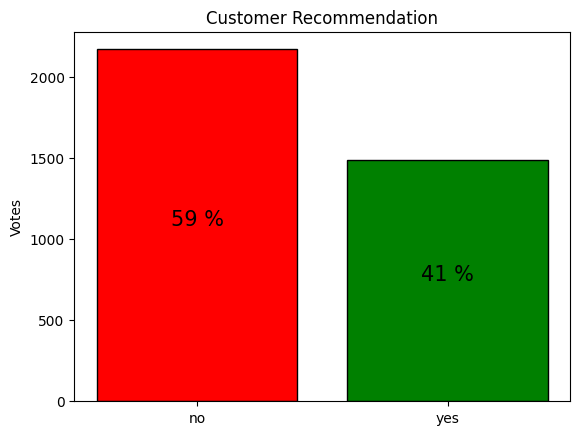

In [17]:
dict1=data['recommended'].value_counts()
graph1=pt.bar(dict1.index,dict1.values,color=['Red','Green'],edgecolor='black')
for bar in graph1:
    height=bar.get_height()
    pt.annotate(f'{round(height*100/3660)} %',(bar.get_x()+bar.get_width()/2,height/2),ha='center',fontsize=15)
pt.title('Customer Recommendation')
pt.ylabel('Votes')
pt.savefig('customer_recommendation.jpg')
pt.show()

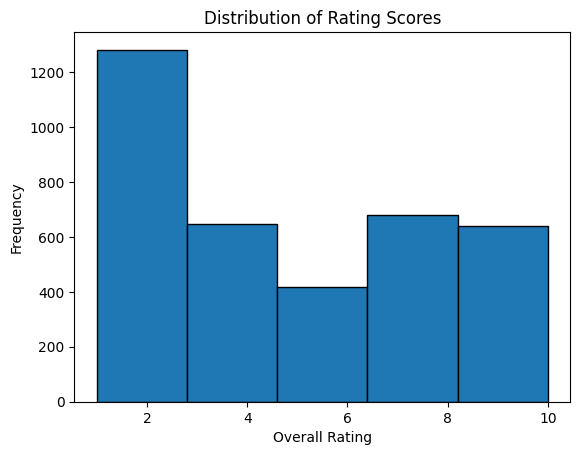

In [18]:
import matplotlib.pyplot as plt

# Plotting the distribution of rating scores among the overall rating
plt.hist(data['overall_rating'], bins=5, edgecolor='black')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Scores')
pt.savefig('Distribution of Rating Scores.jpg')
plt.show()

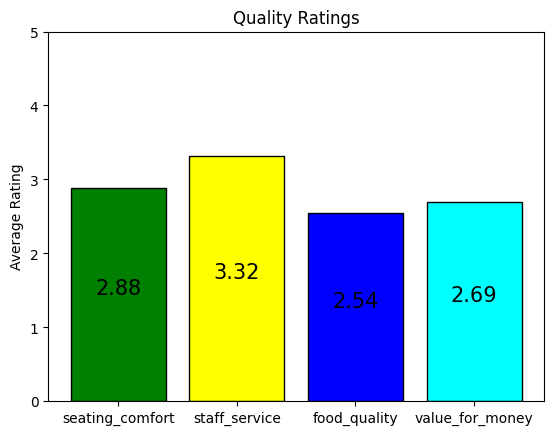

In [19]:
cols=['seating_comfort','staff_service','food_quality','value_for_money']
y=[data[i].mean() for i in cols]
graph2=pt.bar(cols,y,color=['Green','Yellow','Blue','cyan'],edgecolor='black')
for bar in graph2:
    height= bar.get_height()
    pt.annotate(round(height,2),(bar.get_x()+bar.get_width()/2,height/2),ha='center',color='black',fontsize=15)
pt.ylim(0,5)
pt.title('Quality Ratings')
pt.ylabel('Average Rating')
pt.savefig('Quality_Ratings.jpg')
pt.show()

Analysis Per Class

In [20]:
class_wise=data.groupby('travel_class').mean()
class_wise=class_wise.reindex(['Economy Class','Premium Economy','Business Class','First Class']).drop(['overall_rating'],axis='columns')
class_wise

,seating_comfort,staff_service,food_quality,value_for_money
travel_class,,,,
Economy Class,2.743129,3.173362,2.260042,2.600423
Premium Economy,3.044944,3.168539,2.598315,2.685393
Business Class,2.907268,3.485380,2.849624,2.765246
First Class,3.697674,3.939535,3.241860,3.116279


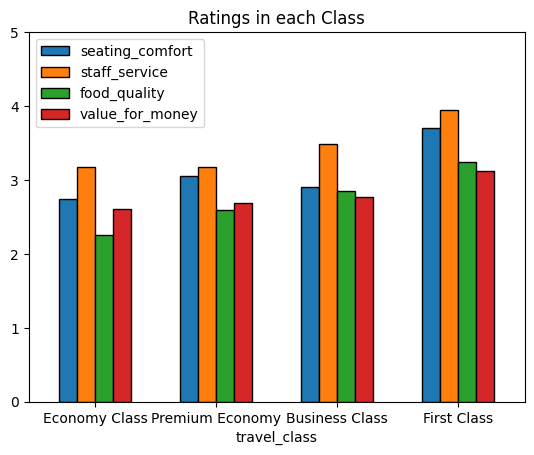

In [21]:
class_wise.plot(kind='bar',edgecolor='black',width=0.6)
pt.xticks(rotation=0)
pt.title("Ratings in each Class")
pt.savefig('Class_Ratings.jpg')
pt.ylim(0,5)
pt.show()

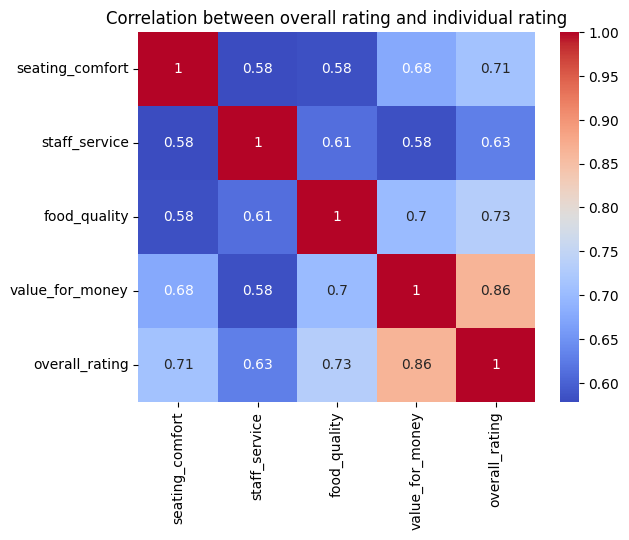

In [22]:
import seaborn as sns

spearman_corr = data[['seating_comfort', 'staff_service', 'food_quality', 'value_for_money', 'overall_rating',]].corr(method='spearman')

sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
pt.title("Correlation between overall rating and individual rating")
pt.savefig('Corelation.jpg')

Sentiment Analysis

In [23]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

reviews=data[['review']]
file1=open('negative-words.txt','r',encoding='latin-1')
negative_words=file1.read().split('\n')
file1.close()
file2=open('positive-words.txt','r',encoding='latin-1')
positive_words=file2.read().split('\n')
file2.close()

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words=stopwords.words('english')
lemma=WordNetLemmatizer()

import re

def preprocess(text):
    corpus=re.sub('[^a-zA-Z0-9 \n\.]', ' ', text)
    tokens=word_tokenize(corpus)
    tokens=[i for i in tokens if i not in stop_words]
    tokens=[lemma.lemmatize(i).lower() for i in tokens]
    return tokens
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/repl/nltk_data...
[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /home/repl/nltk_data...


True

In [24]:
reviews['filtered']=reviews['review'].apply(preprocess)

In [25]:
def sentiment(corpus):
    pos=len([i for i in corpus if i in positive_words])
    neg=len([i for i in corpus if i in negative_words])
    return pos/(neg+1)
reviews['sentiment_score']=reviews['filtered'].apply(sentiment)

In [26]:
reviews.sample(5)

,review,filtered,sentiment_score
1414,I was told on the Saturday that my hand lugga...,"[i, told, saturday, hand, luggage, fine, right...",0.714286
479,I booked and paid for what I thought was a b...,"[i, booked, paid, i, thought, business, class,...",0.600000
3544,Having taken several domestic flights to Londo...,"[having, taken, several, domestic, flight, lon...",3.000000
1176,Flew Barcelona to Gatwick. This review is ab...,"[flew, barcelona, gatwick, ., this, review, ar...",0.000000
1491,"Unimpressed! Service very indifferent, impre...","[unimpressed, service, indifferent, impression...",2.571429


In [27]:
reviews.review.iloc[-1]

'Heathrow Marrakech. Had previously travelled on the British Midland service with mixed results. Things seem to have improved since the take-over and integration of services. Staff more attentive both on the ground and inflight. Meals seem to have improved too. There has been a real lack of choice on this route (still is) but hopefully the improvement will be consistent.'

In [28]:
reviews.sentiment_score.iloc[-1]

2.5

In [29]:
def sentiment(score):
    if score<=1.1 and score>=0.9:
        return 'Neutral'
    if score>1.1:
        return 'Positive'
    return 'Negative'
reviews['sentiment']=reviews['sentiment_score'].apply(sentiment)

In [30]:
data['sentiment']=reviews['sentiment']
counts=reviews.sentiment.value_counts()

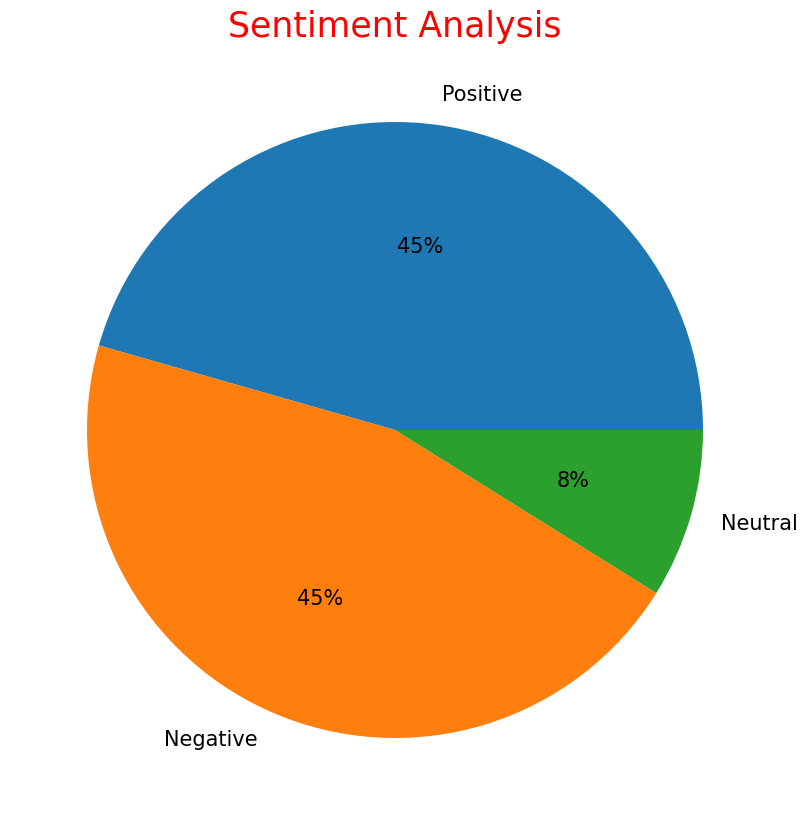

In [31]:
fig=pt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
pt.pie(counts.values,labels=counts.index,autopct='%1.1i%%',textprops={'fontsize':15})
pt.title('Sentiment Analysis',fontsize=25,color='red')
pt.savefig('Sentiment_Analysis.jpg')
pt.show()